Ref: https://data-challenge.lighthouselabs.ca/challenge/19

### **Day 19: *Histograms with Matplotlib***

After their time in Asia, Dot hopped on a long overnight flight back to the other side of the globe. On a large plane filled with snoozing passengers, Dot headed east back to the Americas. Their destination: Honolulu, Hawaii. They deboarded after many hours, stretching and yawning and ready to bask in the sun. “I’m heading over to the Honolulu Zoo; what about you?” a fellow passenger asked kindly. Dot yelped and shook their head fiercely. No more zoos for them! They had a room in a hotel right on Waikiki Beach. They were excited to spend their time in Hawaii doing nothing except sunbathing. They were grateful for the excitement of the last couple of weeks, but now was the time for pure, unbothered relaxation. 

As soon as Dot checked into their hotel, they headed right for the beach with sunscreen, a towel, and a favourite book. They lowered their sunglasses over their eyes and stretched out among the sand and the heat. They were surrounded by palm trees and crystal-clear water, and down the shoreline, they could see the Lēʻahi volcano. Other beachgoers were splashing around or paddling lazily on surfboards in the water. What a beautiful day! After finishing their book and snapping it closed, it was time for Dot to start thinking about the end of their around-the-world trip. First, they needed to plan their way home. Can you help Dot find out which US city has the best connection with Vancouver?


### Tutorial

While working with data, we may want to figure out the frequency distribution of a numerical dataset. The frequency distribution refers to how often each value occurs within a dataset. This can be important to know so that we can understand whether the data we are analyzing is normally distributed or skewed. 

The best way to visualize the distribution of our dataset is with a histogram. Histograms are a graphical representation of data using bars of different heights. Similar to bar charts, histograms group numbers into buckets. The size of each bar shows how many fall into each range. 

**Building a histogram with MatPlotLib**

Here is how a histogram can be built using Matplotlib:

```python
plt.figure()
plt.hist(df['numerical_data'], bins = 40) #Play around with the bin sizes when plotting your histogram
plt.show()
```

**Normal Distribution**

A histogram with the following characteristics would have a normal distribution:

- the mean & the median are the same.
- 1 standard deviation from the mean captures 68.2% of the data.
- 2 standard deviations from the mean captures 95.4% of the data.

![normal_distribution](images/n_distribution.png)

*Image Taken from [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:Normal_Distribution_Sigma.svg)*


**Skewed Distribution**

Within this image, we can see the two types of skewed distribution:

![skewed_distribution](images/skew.png)

*Image Taken from [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:Negative_and_positive_skew_diagrams_(English).svg)*

**Note:** Negative skew also refers to **left skew** and positive skew also refers to **right skew.** 

**Histogram vs. Bar Plot?**

Histograms and barplots look nearly identical, and it can be easy to mistake them in some instances. Their differences lie in what they're typically used for. Bar plots tend to measure categorical data, whereas histograms measure the frequency (probability that specific value occurs) in numerical data.

To learn more on interpreting histograms, read this [article](https://www.ck12.org/book/ck-12-probability-and-statistics-concepts/section/4.6/).


### Challenge

Use air traffic data to help Dot by finding out which US city has the best connection with Vancouver.

1. **What is the origin city (using variable ORIGIN_CITY_NAME) with the highest total number of passengers who travelled to Vancouver?**
2. **According to our data, how many passengers travelled from that origin city to Vancouver?**
3. **Use a histogram to plot the probability distribution of distances for all routes in June 2021.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('air_traffic_data.csv')
df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,YEAR,MONTH,Unnamed: 12
0,0.0,2470.0,2GQ,Cavok Air LLC,13269,MGA,"Managua, Nicaragua",14691,SBD,"San Bernardino, CA",2021,1,NaN
1,0.0,2077.0,2GQ,Cavok Air LLC,13269,MGA,"Managua, Nicaragua",14512,RFD,"Rockford, IL",2021,1,NaN
2,0.0,2470.0,2GQ,Cavok Air LLC,14691,SBD,"San Bernardino, CA",13269,MGA,"Managua, Nicaragua",2021,1,NaN
3,0.0,3457.0,KL,Klm Royal Dutch Airlines,10721,BOS,"Boston, MA",10292,AMS,"Amsterdam, Netherlands",2021,1,NaN
4,0.0,4120.0,KL,Klm Royal Dutch Airlines,13930,ORD,"Chicago, IL",10292,AMS,"Amsterdam, Netherlands",2021,1,NaN


In [2]:
(df[df.DEST_CITY_NAME == 'Vancouver, Canada']  # flights to vancouver
    .groupby('ORIGIN_CITY_NAME')  # by origin city
    ['PASSENGERS'].sum()  # total passenger counts
    .agg(['idxmax', 'max'])  # find the best connection to vancouver
)

idxmax    Seattle, WA
max           17109.0
Name: PASSENGERS, dtype: object

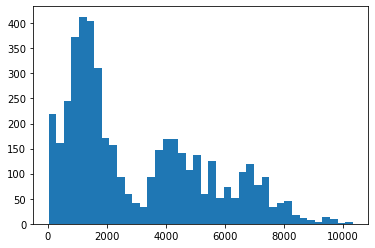

In [3]:
plt.figure()
plt.hist(df[(df.YEAR == 2021) & (df.MONTH == 6)].DISTANCE, bins = 40)
plt.show()

### Answer

1. Seattle
2. 17109

![Challenge 19 Solved](https://data-challenge.lighthouselabs.ca/img/badges/badge19@72x.png)